In [1]:
import pickle
import s3fs
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show

# Downloading jitter data 
**S3 bucket**

In [8]:
s3 = s3fs.S3FileSystem()
s3key = 'gmto.starccm/StandardYear/20Hz/case_13_0az_cd_22vel/'

**Mount control data**

In [10]:
with s3.open(s3key+'FEM1_cubic_MOUNT_CTRL_Jitter_top-end--truss--GIR--C-Ring--M1--M2.pickle','rb') as f:
    data_mc = pickle.load(f)

**Mount control w/ FSM data**

In [11]:
with s3.open(s3key+'FEM1_cubic_MOUNT_CTRL_TT7_Jitter_top-end--truss--GIR--C-Ring--M1--M2.pickle','rb') as f:
    data_mct = pickle.load(f)

# Time series

In [12]:
rd2mas = 180*3600e3/np.pi
l = int(10*2e3)

## E axis

In [14]:
p = figure(plot_width=900,plot_height=400)#,x_range=[0,30])#,y_range=[100,300])
p.line(data_mc['Data']['Time'][:],rd2mas*data_mc['Data']['Pupil'][0,:],color='green',alpha=0.5,legend='Mount Ctrl.')
p.line(data_mct['Data']['Time'][:],rd2mas*data_mct['Data']['Pupil'][0,:],color='red',alpha=0.5,legend='Mount Ctrl. w/ FSM')
p.legend.location = 'bottom_right'
p.legend.click_policy="hide"
p.legend.click_policy="hide"
show(p)

## A axis

In [15]:
p = figure(plot_width=900,plot_height=400)#,x_range=[0,30])#,y_range=[100,300])
p.line(data_mc['Data']['Time'][:],rd2mas*data_mc['Data']['Pupil'][1,:],color='green',alpha=0.5,legend='Mount Ctrl.')
p.line(data_mct['Data']['Time'][:],rd2mas*data_mct['Data']['Pupil'][1,:],color='red',alpha=0.5,legend='Mount Ctrl. w/ FSM')
p.legend.location = 'bottom_right'
p.legend.click_policy="hide"
show(p)

# Statistics

JITTER RMS [E,A] [mas]:  [196.86912647672443, 86.64853687481967]


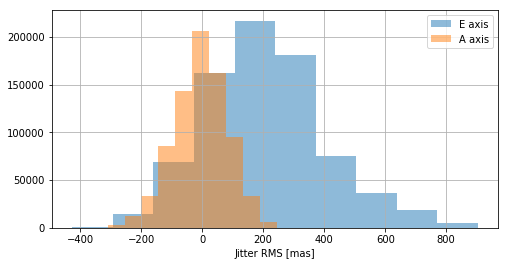

In [37]:
fig,ax1=plt.subplots(ncols=1)
fig.set_size_inches(8,4)
ax1.hist(rd2mas*data_mc['Data']['Pupil'][0,l:],alpha=.5,label='E axis')
ax1.hist(rd2mas*data_mc['Data']['Pupil'][1,l:],alpha=.5,label='A axis')
ax1.grid()
ax1.legend()
ax1.set_xlabel('Jitter RMS [mas]')
print("JITTER RMS [E,A] [mas]: ",np.std(rd2mas*data_mc['Data']['Pupil'][:,l:],axis=1).tolist())

**Mount control w/ FSM**

JITTER RMS [E,A] [mas]:  [9.319144742149769, 3.8395019947061964]


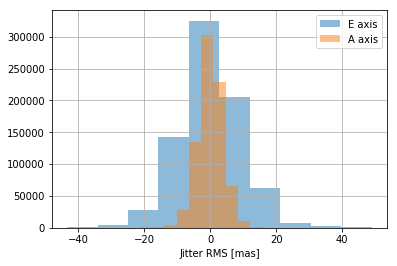

In [28]:
fig,ax1=plt.subplots()
fig.set_size_inches(6,4)
ax1.hist(rd2mas*data_mct['Data']['Pupil'][0,l:],alpha=.5,label='E axis')
ax1.hist(rd2mas*data_mct['Data']['Pupil'][1,l:],alpha=.5,label='A axis');
ax1.grid()
ax1.set_xlabel('Jitter RMS [mas]')
ax1.legend()
print("JITTER RMS [E,A] [mas]: ",np.std(rd2mas*data_mct['Data']['Pupil'][:,l:],axis=1).tolist())

# PSD

In [29]:
from scipy.signal import welch

In [30]:
W_mc = [None]*2
W_lr = [None]*2
W_mct = [None]*2

In [31]:
for k in range(2):
    nu, W_mc[k] = welch(rd2mas*data_mc['Data']['Pupil'][k,l:],2e3,nperseg=20e3)
    nu, W_mct[k] = welch(rd2mas*data_mct['Data']['Pupil'][k,l:],2e3,nperseg=20e3)

Text(0,0.5,'E jitter PSD [mas^2/Hz]')

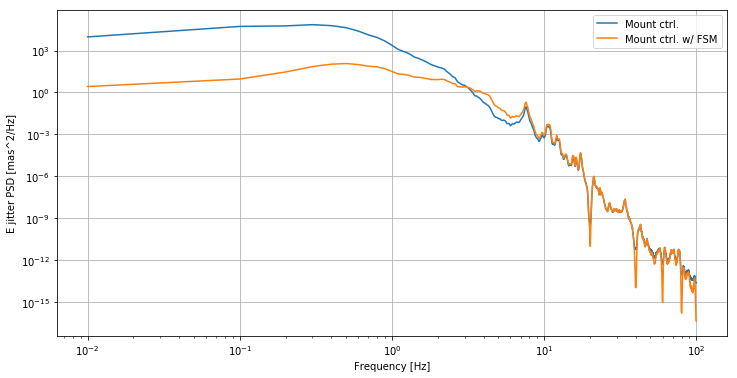

In [33]:
idx = nu<=100 
nu[0] = 1e-2
fig = plt.figure()
fig.set_size_inches(12,6)
plt.loglog(nu[idx],W_mc[0][idx],label='Mount ctrl.')
#plt.loglog(nu[idx],np.abs( E_wfsm(nu[idx],T,0,0.8,lpf_g) )**2*W_mc[0][idx],label='Mount ctrl. #')
plt.loglog(nu[idx],W_mct[0][idx],label='Mount ctrl. w/ FSM')
plt.grid()
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('E jitter PSD [mas^2/Hz]')
#plt.xlim([1e-1,100])
#plt.ylim([1e-12,3e3])

Text(0,0.5,'A jitter PSD [mas^2/Hz]')

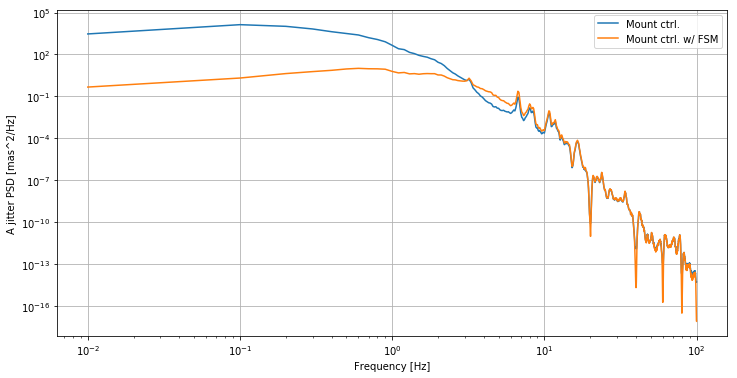

In [34]:
idx = nu<100 
nu[0] = 1e-2
fig = plt.figure()
fig.set_size_inches(12,6)
plt.loglog(nu[idx],W_mc[1][idx],label='Mount ctrl.')
plt.loglog(nu[idx],W_mct[1][idx],label='Mount ctrl. w/ FSM')
plt.grid()
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('A jitter PSD [mas^2/Hz]')
#plt.xlim([1e-1,100])
#plt.ylim([1e-12,3e3])